
# 90-803 Machine Learning Foundations with Python
# Final Group Project:  Yilin Lyu


# Team 5 members: Apoorva Shetty, Enze Zhao, Yilin Lyu
# Team name: team5_AS_EZ_YL

# Spring 2023


### Question: Predict the percentage of positive COVID-19 tests of a specific state based on individual life decision behaviors and medical behaviors.

- Target Variable: Percentage of positive COVID-19 tests
- Prediction Features:
1. Mask-Wearing Compliance (numerical, e.g., percentage of people wearing masks)
2. Vaccination Rate (numerical, e.g., percentage of the population vaccinated)
3. Google Search Trends 
4. doc_visit                               
5. HS_percapita                            
6. Political_Leaning                       
7. Public_transit                                                      
8. Inperson_school_fulltime                
9. Daily admission per 100,000 population  
10.Confirmed daily deaths per 100,000                 
11.PL_Party_num 




# Table of Content 
## 1. Data Processing and visiualiztaion 
## 2. Feature Enginerring 
## 3. Model Training, Tuning and Performance Metrics 
### - Linear regression 
### - Polynomial  regression 
### - Decision Tree 
### - Random Forest 
## 4. Additional Model 
### - Elastic Net 
## 5. Conclusion & Future Work 


# Installing and loading packages
## The list below are all the required libraries. Load the libraries as indicated below.

In [106]:
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

import sklearn.tree as tree


from sklearn.linear_model import ElasticNet

In [107]:
tscv = TimeSeriesSplit() #create TimeSeriesSplit object

In [108]:
df = pd.read_csv('covid_cleaned.csv')

# Make sure the dataset and the notebook are in the same folder 

In [109]:
seed = 1


# 1. Data Processing

#### 1. Check missing data 

In [110]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27552 entries, 0 to 27551
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              27552 non-null  int64  
 1   state                                   27552 non-null  object 
 2   date                                    27552 non-null  object 
 3   doc_visit                               27552 non-null  float64
 4   google_search                           27552 non-null  float64
 5   HS_percapita                            27552 non-null  float64
 6   Political_Leaning                       27552 non-null  float64
 7   region                                  27552 non-null  object 
 8   public_transit                          27552 non-null  float64
 9   mask_wearing                            27552 non-null  float64
 10  inperson_school_fulltime                27552 non-null  fl

No missing data found as we have handeled all the missing data after we merged the columns 

### 2. Handle object data type

In [111]:
#change state into state_code


In [112]:
#encoder = OneHotEncoder()

# Encode the region data using one-hot encoding
#region_encoded = encoder.fit_transform(df[['region']])

# Convert the sparse matrix to a dense array and add column names
#region_array = pd.DataFrame(region_encoded.toarray(), columns=encoder.get_feature_names_out(['region']))

# Drop the original region column from the dataset and replace it with the encoded columns
#df = pd.concat([df.drop('region', axis=1), region_array], axis=1)

# Print the resulting encoded data
#print(df.head())



# Encode the region data using one-hot encoding
#region_encoded = encoder.fit_transform(df[['state']])

# Convert the sparse matrix to a dense array and add column names
#region_array = pd.DataFrame(region_encoded.toarray(), columns=encoder.get_feature_names_out(['state']))

# Drop the original region column from the dataset and replace it with the encoded columns
#df = pd.concat([df.drop('state', axis=1), region_array], axis=1)

# Print the resulting encoded data
#print(df.head())





State and Region are objects. I tried to change into numerical data by assign a number to each state and region, but this way, it will give unfair weight to each state and region but in reality, it's just nomial data rather than oridnal data. 

I then tried to use OneHotEnocder, but change the value to boolean value will give errors to modling later. 

Given the question is asking about the covid_positive from a national perspective. I will drop both region and state column. 

In [113]:
# drop column not needed 
df=df.drop(['state'],axis=1)
df=df.drop(['region'],axis=1)

In [114]:
#check the current data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27552 entries, 0 to 27551
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              27552 non-null  int64  
 1   date                                    27552 non-null  object 
 2   doc_visit                               27552 non-null  float64
 3   google_search                           27552 non-null  float64
 4   HS_percapita                            27552 non-null  float64
 5   Political_Leaning                       27552 non-null  float64
 6   public_transit                          27552 non-null  float64
 7   mask_wearing                            27552 non-null  float64
 8   inperson_school_fulltime                27552 non-null  float64
 9   daily admission per 100,000 population  27552 non-null  float64
 10  confirmed daily deaths per 100,000      27552 non-null  fl

### 3. Drop columns not needed

 'PL_Party' has already been transferred to PL_Party_num. 
 'Unamded: 0 ' were just index used for merging the dataset. Both of those two columns does not have real meanings to our prediction target variables. 

In [115]:

#drop the column as planned
df=df.drop(['PL_Party'],axis=1)
df=df.drop(['Unnamed: 0'],axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27552 entries, 0 to 27551
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    27552 non-null  object 
 1   doc_visit                               27552 non-null  float64
 2   google_search                           27552 non-null  float64
 3   HS_percapita                            27552 non-null  float64
 4   Political_Leaning                       27552 non-null  float64
 5   public_transit                          27552 non-null  float64
 6   mask_wearing                            27552 non-null  float64
 7   inperson_school_fulltime                27552 non-null  float64
 8   daily admission per 100,000 population  27552 non-null  float64
 9   confirmed daily deaths per 100,000      27552 non-null  float64
 10  test_positive all ages                  27552 non-null  fl

### 4. Check correlation 

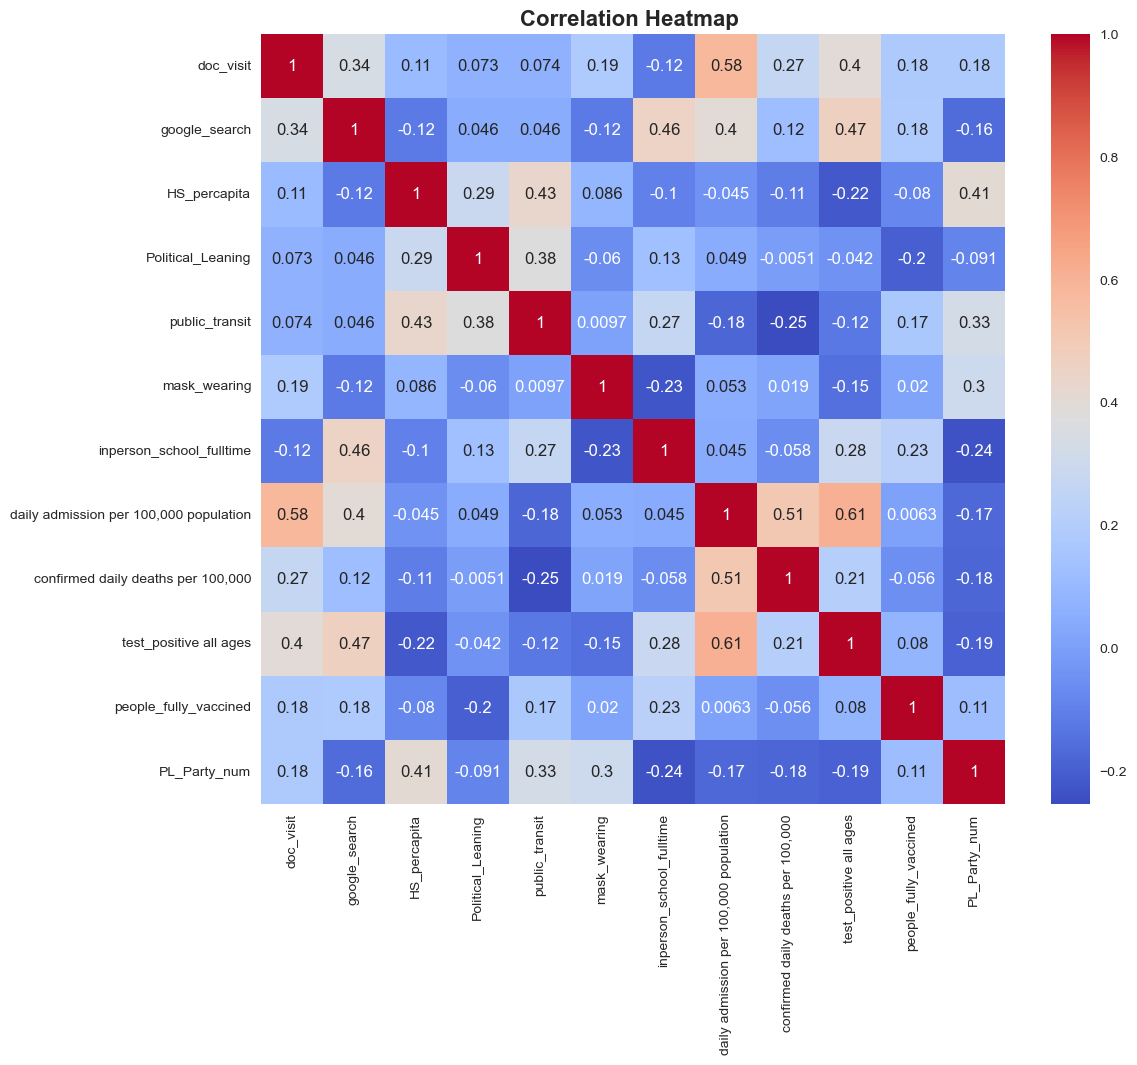

In [116]:
# creating a correlation plot to check if there is any variables that are highly 
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap ", fontsize=16, fontweight='bold')
plt.show() 

There are no variables that are too highly correlated with each other. For modling, I will be expecting seeing 'daily admission. 'doc_visit' and' google search' being picked as selected features as they have a relative high correlation with 'test positive'. 

# 2.  Feature Enginerring



# split dataset according to time 

In [117]:
#find out the date to cutoff between train and test
# Sort By Date
df = df.sort_values('date')

dates = df['date'].unique()
print(len(dates)*0.75)

405.75


In [118]:
#find the cirtical date
dates[406]

'2022-02-11'

In [119]:
#split accoridng to the critical date
cut_off_date = dates[406]

df['date'] = pd.to_datetime(df['date'])
train_df = df[df['date'] < '2022-02-11']
test_df = df[df['date'] >= '2022-02-11']

test_df

,date,doc_visit,google_search,HS_percapita,Political_Leaning,public_transit,mask_wearing,inperson_school_fulltime,"daily admission per 100,000 population","confirmed daily deaths per 100,000",test_positive all ages,people_fully_vaccined,PL_Party_num
4154,2022-02-11,8.749653,1.493333,14381.0,68.2,20.478723,91.813407,88.559322,2.084289,0.320660,15.454546,477219.4,1
20925,2022-02-11,1.610020,1.906667,11603.0,2.9,5.126247,57.028042,81.496107,2.537918,0.866088,9.970238,8180675.4,0
26335,2022-02-11,0.811746,1.993333,9982.0,4.1,3.725998,52.367039,88.834962,2.814205,0.678446,15.307692,3609757.0,0
10105,2022-02-11,1.456359,2.428333,10515.0,20.5,3.298155,56.245596,85.909065,3.724180,0.833404,13.156973,2338187.6,0
8482,2022-02-11,1.225632,1.753333,10517.0,20.0,3.121119,51.102599,87.410018,3.445091,0.896697,15.223147,3501698.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22141,2022-06-25,1.661827,2.353333,8766.0,18.6,4.277664,24.461700,82.589270,1.305909,0.032853,20.606293,2737195.8,0
5911,2022-06-25,1.721374,2.158333,8758.0,7.4,6.136441,28.050791,87.595152,1.275175,0.116046,22.491979,5426461.4,0
22682,2022-06-25,1.350014,1.461667,12495.0,32.2,5.903503,17.297529,74.070321,1.312206,0.081294,11.309524,505482.2,0
14567,2022-06-25,1.172926,1.993333,10212.0,20.0,4.651440,14.871820,83.006937,2.326799,0.052882,24.418843,577531.0,0


In [120]:
#checking the training dataset
train_df.describe()

,doc_visit,google_search,HS_percapita,Political_Leaning,public_transit,mask_wearing,inperson_school_fulltime,"daily admission per 100,000 population","confirmed daily deaths per 100,000",test_positive all ages,people_fully_vaccined,PL_Party_num
count,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,2.066700e+04,20667.000000
mean,2.888289,2.307195,10471.106014,19.224396,4.184216,59.535750,65.494391,2.390466,0.405389,9.990549,2.706088e+06,0.392897
std,2.576479,0.767913,1613.255818,13.569384,3.149792,22.846576,20.310078,1.955232,0.420453,7.294006,3.752177e+06,0.488406
min,0.010415,0.728333,7522.000000,0.300000,0.753427,9.975303,5.805788,0.027027,-1.104574,0.077280,2.803000e+03,0.000000
25%,1.289426,1.771667,9280.000000,7.600000,2.665376,42.735284,54.444251,0.977752,0.129006,4.808113,4.869070e+05,0.000000
50%,2.117572,2.143333,10212.000000,20.000000,3.489980,58.754929,68.669173,1.761124,0.266427,8.153365,1.434201e+06,0.000000
75%,3.623084,2.666667,11694.000000,27.500000,4.705330,81.166985,82.799306,3.260098,0.570612,13.297258,3.443112e+06,1.000000
max,33.920778,6.606667,14381.000000,68.200000,34.279476,99.576271,95.909091,13.560617,6.158157,44.900173,2.613375e+07,1.000000


In [121]:
#Split training and testing data into X_train, X_test, y_train, y_test
train_df=train_df.drop(['date'], axis=1)
test_df=test_df.drop(['date'], axis=1)

X_train = train_df.drop(['test_positive all ages'], axis=1)
X_test = test_df.drop(['test_positive all ages'], axis=1)
y_train = train_df['test_positive all ages']
y_test = test_df['test_positive all ages']

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20667 entries, 6453 to 9022
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   doc_visit                               20667 non-null  float64
 1   google_search                           20667 non-null  float64
 2   HS_percapita                            20667 non-null  float64
 3   Political_Leaning                       20667 non-null  float64
 4   public_transit                          20667 non-null  float64
 5   mask_wearing                            20667 non-null  float64
 6   inperson_school_fulltime                20667 non-null  float64
 7   daily admission per 100,000 population  20667 non-null  float64
 8   confirmed daily deaths per 100,000      20667 non-null  float64
 9   people_fully_vaccined                   20667 non-null  float64
 10  PL_Party_num                            20667 non-null  

## Standarize the data 

In [123]:
#check the distribution of testing datase
X_test.describe()

,doc_visit,google_search,HS_percapita,Political_Leaning,public_transit,mask_wearing,inperson_school_fulltime,"daily admission per 100,000 population","confirmed daily deaths per 100,000",people_fully_vaccined,PL_Party_num
count,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6.885000e+03,6885.000000
mean,1.345543,2.319305,10477.078431,19.215686,6.102170,36.100761,81.781942,1.036247,0.250157,3.952489e+06,0.392157
std,1.024638,0.410834,1617.667746,13.558739,3.859552,15.426923,11.001287,0.723291,0.280852,4.688622e+06,0.488267
min,0.158835,0.990000,7522.000000,0.300000,1.343651,5.859959,27.830189,0.081859,-0.672349,2.752446e+05,0.000000
25%,0.705189,2.060000,9280.000000,7.600000,4.349287,24.653834,80.894309,0.522368,0.070405,9.872830e+05,0.000000
50%,1.053349,2.318333,10212.000000,20.000000,5.209663,33.260604,83.517975,0.867089,0.130666,2.423717e+06,0.000000
75%,1.627945,2.570000,11694.000000,27.500000,6.563201,45.030035,88.559322,1.321336,0.355745,5.174451e+06,1.000000
max,13.396846,4.446667,14381.000000,68.200000,40.607735,91.880521,94.118819,7.945314,1.793192,2.613375e+07,1.000000


Our train data has a very large variation between different, so for better modling, I will standarize the data 

In [124]:
# Using MinMax Scaler because we want to normalize the data to ranges 0 and 1 
sc = StandardScaler()

# Peforming Scaling on the required columns 
cols_s = ['doc_visit', 'google_search', 
          'Political_Leaning','public_transit',
       'inperson_school_fulltime', 'HS_percapita',
        'mask_wearing','daily admission per 100,000 population',
       'people_fully_vaccined', 
       'confirmed daily deaths per 100,000']
Sc_Train=pd.DataFrame(sc.fit_transform(X_train[cols_s]),columns=cols_s,index=X_train.index)
Sc_Test=pd.DataFrame(sc.fit_transform(X_test[cols_s]),columns=cols_s,index=X_test.index)
Sc_Train.head()

,doc_visit,google_search,Political_Leaning,public_transit,inperson_school_fulltime,HS_percapita,mask_wearing,"daily admission per 100,000 population",people_fully_vaccined,"confirmed daily deaths per 100,000"
6453,-0.265985,-0.237265,-0.701920,-0.791784,-0.745773,-0.422824,-0.316068,0.100775,-0.480936,0.700560
16732,4.718048,-0.280674,-0.532417,-0.262508,-2.429565,0.865906,-1.544585,1.146440,-0.477654,1.197101
24847,2.968868,-0.929635,0.609888,-0.984322,-1.373211,1.416359,-1.198024,-0.835819,0.825915,-0.092058
3207,4.358634,-0.358810,-0.525047,-0.894363,-1.689740,1.250851,-1.620087,0.704152,0.295869,0.984484
26470,2.343792,-0.235095,1.199465,-0.949651,-2.505750,1.424417,-1.816041,1.548881,0.240844,1.206072


In [125]:
Sc_Train.shape

(20667, 10)

In [99]:
#Checking the scaler result
Sc_Train.describe()

,doc_visit,google_search,mask_wearing,Political_Leaning,public_transit,inperson_school_fulltime,HS_percapita,mask_wearing,"daily admission per 100,000 population",people_fully_vaccined,"confirmed daily deaths per 100,000"
count,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04,2.066700e+04
mean,-1.458836e-16,-1.887539e-15,6.914895e-16,1.678899e-16,-5.949553e-16,1.083797e-14,5.644963e-16,6.914895e-16,-2.122268e-15,-1.395380e-16,-7.633556e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.117007e+00,-2.056093e+00,-2.169325e+00,-1.394673e+00,-1.089238e+00,-2.938937e+00,-1.828090e+00,-2.169325e+00,-1.208806e+00,-7.204754e-01,-3.591361e+00
25%,-6.205764e-01,-6.973981e-01,-7.353781e-01,-8.566842e-01,-4.822148e-01,-5.440849e-01,-7.383422e-01,-7.353781e-01,-7.225477e-01,-5.914527e-01,-6.573620e-01
50%,-2.991430e-01,-2.133905e-01,-3.417754e-02,5.715973e-02,-2.204124e-01,1.563194e-01,-1.606145e-01,-3.417754e-02,-3.218834e-01,-3.389813e-01,-3.305144e-01
75%,2.852002e-01,4.681272e-01,9.468271e-01,6.098879e-01,1.654478e-01,8.520565e-01,7.580469e-01,9.468271e-01,4.447828e-01,1.964304e-01,3.929725e-01
max,1.204483e+01,5.599043e+00,1.752625e+00,3.609360e+00,9.554912e+00,1.497554e+00,2.423663e+00,1.752625e+00,5.713093e+00,6.243903e+00,1.368263e+01


In [126]:
#split the training and testing 
X_train = X_train.drop(columns=cols_s)
X_train = pd.concat([X_train,Sc_Train],axis=1)
X_test = X_test.drop(columns=cols_s)
X_test = pd.concat([X_test,Sc_Test],axis=1)

In [127]:
X_train.head()

,PL_Party_num,doc_visit,google_search,Political_Leaning,public_transit,inperson_school_fulltime,HS_percapita,mask_wearing,"daily admission per 100,000 population",people_fully_vaccined,"confirmed daily deaths per 100,000"
6453,0,-0.265985,-0.237265,-0.701920,-0.791784,-0.745773,-0.422824,-0.316068,0.100775,-0.480936,0.700560
16732,1,4.718048,-0.280674,-0.532417,-0.262508,-2.429565,0.865906,-1.544585,1.146440,-0.477654,1.197101
24847,1,2.968868,-0.929635,0.609888,-0.984322,-1.373211,1.416359,-1.198024,-0.835819,0.825915,-0.092058
3207,1,4.358634,-0.358810,-0.525047,-0.894363,-1.689740,1.250851,-1.620087,0.704152,0.295869,0.984484
26470,0,2.343792,-0.235095,1.199465,-0.949651,-2.505750,1.424417,-1.816041,1.548881,0.240844,1.206072


In [128]:
X_train.shape

(20667, 11)

In [129]:
y_train.shape


(20667,)

In [130]:
X_test.shape

(6885, 11)

In [131]:
y_test.shape

(6885,)

We see big difference between the training dataset and testing dataset. I will try to use clustering for both training and texting to address this issue. 

# Clustering


Since our dataset is foundamentally a time serie data. We decide to add clustering to help with our prediction model by gaining more information about the data. 

Use kMeans to cluster X_train and y_train. I will be using two method to determine the best K for our training data- GridSeachCV and Elbow

In [132]:
X=df.drop(['date','test_positive all ages'],axis=1)

###### Moving forward I will be using tscv for my cv whenever I do GridSearchCV for CV

In [133]:
# Using Gridsearch CV to find another optimal K 
model = KMeans()
# define searching region
param_grid = {
    'n_clusters': [2,3,4,5,6,7,8],
    'init': ['k-means++', 'random']}
#Use gridsearch to find the best parameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=tscv)
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_



In [134]:
# print out the best param- n_cluster 
best_params['n_clusters']

8

In [135]:
# Fit a new model on the full training data with the best parameters
model = KMeans(**best_params,random_state=None)
model.fit(X_train)



KMeans()

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20667 entries, 6453 to 9022
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PL_Party_num                            20667 non-null  int64  
 1   doc_visit                               20667 non-null  float64
 2   google_search                           20667 non-null  float64
 3   Political_Leaning                       20667 non-null  float64
 4   public_transit                          20667 non-null  float64
 5   inperson_school_fulltime                20667 non-null  float64
 6   HS_percapita                            20667 non-null  float64
 7   mask_wearing                            20667 non-null  float64
 8   daily admission per 100,000 population  20667 non-null  float64
 9   people_fully_vaccined                   20667 non-null  float64
 10  confirmed daily deaths per 100,000      20667 non-null  

In [137]:
# Fit the model on X_train 
train_labels = model.predict(X_train)

# Create a new feature matrix for the test set with the cluster labels as an additional feature
X_train = np.concatenate((X_train, train_labels.reshape(-1, 1)), axis=1)


Both the best parameter and KElbow method agrees that k=8 is the best number of clusters

In [138]:
test_labels = model.predict(X_test)

# add the cluster label feature to X_test
X_test = np.concatenate((X_test, test_labels.reshape(-1, 1)), axis=1)

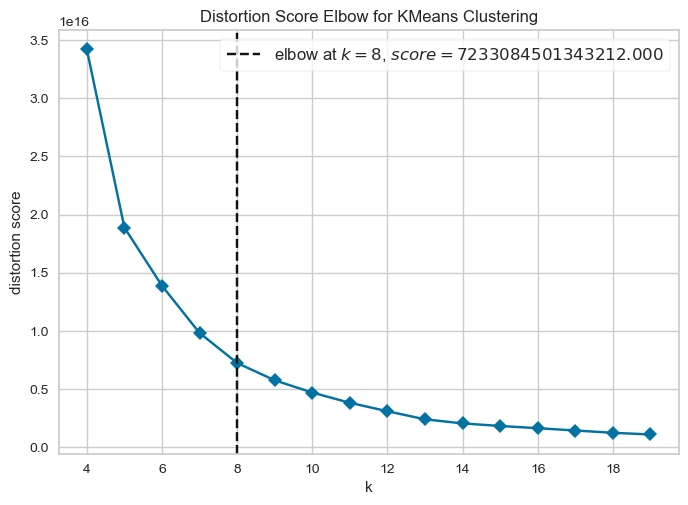

In [139]:
#Using Elbow method to find an optimal number of K 

#run from k=4 to k=20

visualizer = KElbowVisualizer(model, k=(4,20), timings = False)

visualizer.fit(X)
visualizer.show(); 

Check the shape of everything 

Both elbow method return k= 8, while GridsearchCV return k=8 , will trasnform both X_train and X-test with a cluster of k=8 as it also had the option to give k=7 but did not 

In [140]:
X_train

array([[ 0.        , -0.26598496, -0.23726523, ..., -0.48093596,
         0.70055963,  0.        ],
       [ 1.        ,  4.71804796, -0.28067395, ..., -0.47765427,
         1.19710108,  3.        ],
       [ 1.        ,  2.96886756, -0.92963508, ...,  0.82591513,
        -0.09205782,  3.        ],
       ...,
       [ 1.        ,  0.12819643, -0.8059201 , ..., -0.50519378,
         0.12862153,  4.        ],
       [ 0.        ,  0.10375772,  0.22286764, ...,  0.38557312,
         0.98618143,  1.        ],
       [ 0.        , -0.74716107, -0.12006156, ..., -0.2781906 ,
         0.73830481,  1.        ]])

In [141]:
X_train.shape

(20667, 12)

In [142]:
y_train.shape

(20667,)

In [143]:
X_test.shape

(6885, 12)

In [144]:
y_test.shape

(6885,)

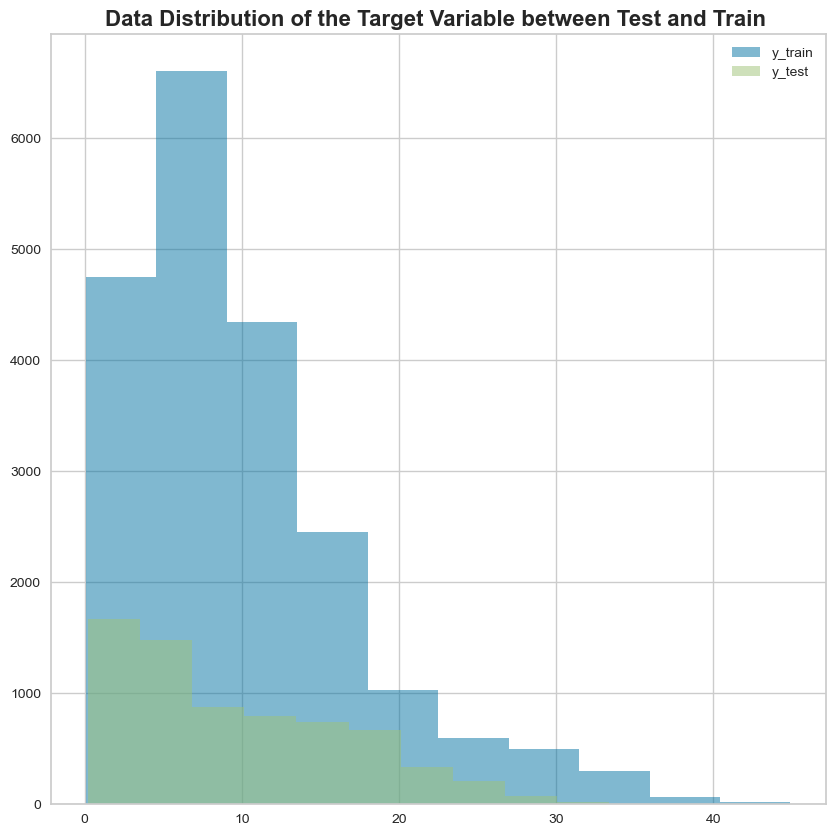

In [145]:
#Visualizing the difference between y_train and y_test. 
fig, axs = plt.subplots(1, 1,figsize=(10, 10))
plt.hist(y_train,alpha=0.5, label='y_train')
plt.hist(y_test, alpha=0.5, label='y_test')
plt.title("Data Distribution of the Target Variable between Test and Train ", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

Since this data is a time serie data, even after we used data engiering, the variance is still there but we are aware the difference between training and testing data.

# 3. Modeling 

For each model, I will present at least two version of the same model. The original version and the the model after tuning and compare the difference between the two versions 

In [146]:
# prepare the function for calulating adjusted R^2
# Introduce adjusted R^2 as a different evaluation metrics 
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

#### 1. Linear regression 
I will be running linear regression for three times, 
- basic linear regression 
- linear regression with feature selection 
- feature selection with grid search CV

1.1 Basic Linear Regression Model 

In [147]:

#create the model 
lm = LinearRegression()
lm.fit(X_train,y_train)
#predict the train and test 
test_pred=lm.predict(X_test)
train_pred=lm.predict(X_train)
# calculate r^2
train_adjusted_r2 = adjusted_r2_score( lm.score(X_train, y_train), len(y_train), X_train.shape[1])
test_adjusted_r2 = adjusted_r2_score(lm.score(X_test, y_test), len(y_test), X_test.shape[1])
#calculate MSRE
mse_train=mean_squared_error(y_train, train_pred)
mse_test=mean_squared_error(y_test, test_pred)
#Print out the result 
print("Training R-squared: ", lm.score(X_train, y_train))
print("Testing R-squared: ", lm.score(X_test, y_test))

print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)

print("train_adjusted_r2:",train_adjusted_r2)
print("test_adjusted_r2:", test_adjusted_r2)


Training R-squared:  0.6351276164846021
Testing R-squared:  0.10391868923416014
Training MSE:  19.411189789197014
Testing MSE:  44.927303678679
train_adjusted_r2: 0.6349156251704652
test_adjusted_r2: 0.10235393723631525


The model seems over fitting the traing dataset since the trianing R-2 is greater than the testing R^2
Hopefully by doing modle tuning, this question can be addressed. 

 #### 1.2 with feature selection
 Using feature selection and try to inmprove the model performance 

In [148]:
# with feature selection and Corss Val 

model = LinearRegression()
#Using Sequential Feature Selection for feature that works the best for the model 
sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = 6, 
                                cv = 10) 
sfs = sfs.fit(X_train, y_train)
feature_names = np.array(df.columns.difference(['test_positive all ages']))

X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

In [149]:
# Train the new model with the feature selected dataset 
reg = LinearRegression().fit(X_train_selected, y_train)

# Calculate all the model evaluation metrics 
train_r2_selected = reg.score(X_train_selected, y_train)
test_r2_selected =  reg.score(X_test_selected, y_test)
reg_train_pred=reg.predict(X_train_selected)
reg_test_pred=reg.predict(X_test_selected)
mse_train = mean_squared_error(y_train, reg_train_pred)
mse_test = mean_squared_error(y_test, reg_test_pred)
train_adjusted_r2 = adjusted_r2_score(train_r2_selected, len(y_train), X_train_selected.shape[1])
test_adjusted_r2 = adjusted_r2_score(test_r2_selected, len(y_test), X_test_selected.shape[1])

# Predict the new model result 
print("R-squared Train: "+str(train_r2_selected))
print("R-squared Test: "+str(test_r2_selected))

print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)

print("train_adjusted_r2:",train_adjusted_r2)
print("test_adjusted_r2:", test_adjusted_r2)

R-squared Train: 0.6127047271328425
R-squared Test: -0.028444011972071026
Training MSE:  20.604086211325942
Testing MSE:  51.563642592767316
train_adjusted_r2: 0.6125922502868986
test_adjusted_r2: -0.029341171621944717


With feature selection, the testing R^2 redueced even more, this could be due to less features were uesd to predict the outcome variable. 

 #### 1.3. Using feature selection and grid search CV 

In [150]:
# Using Kfold and gridsearch cv to dataset that have already been transformed from the previous step 
param_grid = {'fit_intercept': [True, False]}
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='r2')

grid_search.fit(X_train_selected, y_train)
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_selected)
train_R_score = r2_score(y_train_pred, y_train)
y_test_pred = best_model.predict(X_test_selected)
test_R_score = r2_score(y_test_pred, y_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

train_adjusted_r2 = adjusted_r2_score(train_R_score, len(y_train), X_train_selected.shape[1])
test_adjusted_r2 = adjusted_r2_score(test_R_score, len(y_test), X_test_selected.shape[1])



In [151]:
print("R-squared Train: "+str(train_R_score))
print("R-squared Test: "+str(test_R_score))

print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)

print("train_adjusted_r2:",train_adjusted_r2)
print("test_adjusted_r2:", test_adjusted_r2)

R-squared Train: 0.3678924680742891
R-squared Test: -1.5019172606512825
Training MSE:  20.604086211325942
Testing MSE:  51.563642592767316
train_adjusted_r2: 0.36770889376685667
test_adjusted_r2: -1.5040997996980852


Plot the best version of the linear regression model.

Text(0, 0.5, 'Predicted')

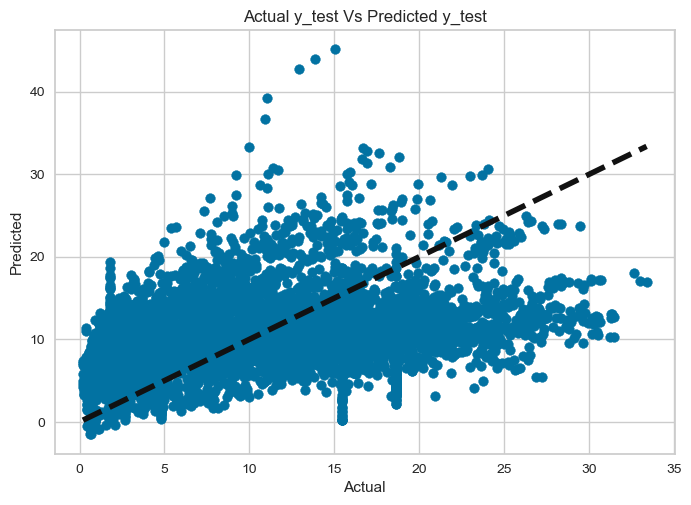

In [152]:
plt.scatter(y_test, test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.title('Actual y_test Vs Predicted y_test')
plt.ylabel('Predicted')

Among all three version of linear regression model, the basic version actually works the best, This could due the small number of features, so without feature selection, more data are being used to predict, so the perform better .

### 2.  Polynomial Regression 

Using three version of Polynomial Regression and for each one will try degree from 1 to 4. 

##### 2.1 basic version

In [153]:

for i in range (1, 5):
    poly_model = PolynomialFeatures(degree=i)
    X_poly_train = poly_model.fit_transform(X_train)
    X_poly_test = poly_model.fit_transform(X_test)
    lm_poly = LinearRegression()
    lm_poly.fit(X_poly_train, y_train)
    ytrain_pred_poly = lm_poly.predict(X_poly_train)  
    train_R_score_poly = r2_score(ytrain_pred_poly, y_train)
    ytest_pred_poly = lm_poly.predict(X_poly_test)
    test_R_score_poly = r2_score(ytest_pred_poly, y_test)
    mse_train = mean_squared_error(y_train, ytrain_pred_poly)
    mse_test = mean_squared_error(y_test, ytest_pred_poly)

    train_adjusted_r2 = adjusted_r2_score(train_R_score_poly, len(y_train), X_poly_train.shape[1])
    test_adjusted_r2 = adjusted_r2_score(test_R_score_poly, len(y_test), X_poly_test.shape[1])
    
    # print out the outcome for each degree 
    print('degree', i)
    print("R-squared Train: "+str(train_R_score_poly))
    print("R-squared Test: "+str(test_R_score_poly))

    print("Training MSE: ", mse_train)
    print("Testing MSE: ", mse_test)

    print("train_adjusted_r2:",train_adjusted_r2)
    print("test_adjusted_r2:", test_adjusted_r2)
    print('\n') 


degree 1
R-squared Train: 0.425513276316109
R-squared Test: -1.288736464529081
Training MSE:  19.411189789197014
Testing MSE:  44.927303678678996
train_adjusted_r2: 0.4251516665060141
test_adjusted_r2: -1.293066776570833


degree 2
R-squared Train: 0.6471253943972575
R-squared Test: -0.6871738688329831
Training MSE:  14.099776819279002
Testing MSE:  39.33623858265406
train_adjusted_r2: 0.6455646853275199
test_adjusted_r2: -0.709775491395003


degree 3
R-squared Train: 0.7814869119567769
R-squared Test: -0.18409473873283133
Training MSE:  9.53982873426992
Testing MSE:  67.43509444616834
train_adjusted_r2: 0.7765676375487978
test_adjusted_r2: -0.2678967462182005


degree 4
R-squared Train: 0.9007563793268063
R-squared Test: 0.016545812465200704
Training MSE:  4.803776027016068
Testing MSE:  688.7316936699029
train_adjusted_r2: 0.8911722028636199
test_adjusted_r2: -0.3369073118067849




Many testing R^2 shows a negative result. It's slighly concerning but as the testing and training are so different, it make sense. 

##### 2.2 with feature selection 

Try to use feature selection to increase the accuracy 

In [154]:


estimator = make_pipeline(
    PolynomialFeatures(),
    LinearRegression())

# perform sequential feature selection with cross-validation
sfs = SequentialFeatureSelector(
    estimator,
    n_features_to_select=6,
    cv=tscv,)

# fit the selector to the training data

sfs = sfs.fit(X_train, y_train)


In [155]:
# transform the train and test based on feature selection 
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

cv_scores = []
for i in range (1, 5):
    poly_model = PolynomialFeatures(degree=i)
    X_poly_train = poly_model.fit_transform(X_train_selected)
    X_poly_test = poly_model.fit_transform(X_test_selected)
    ploy_model2 = reg.fit(X_poly_train, y_train)
    y_predict_train = ploy_model2.predict(X_poly_train)
    y_predict_test = ploy_model2.predict(X_poly_test)
    train_r2 = ploy_model2.score(X_poly_train, y_train)
    test_r2 = ploy_model2.score( X_poly_test, y_test)
    cv_scores.append(test_r2)
    # print out the evaluation outcome 
    print('degree', i)
    print("Training R-squared: ", train_r2)
    print("Testing R-squared: ", test_r2)
    
    print('Training MSE',  mean_squared_error(y_train, y_predict_train))
    print('Testing MSE', mean_squared_error(y_test, y_predict_test))
    
    print("Train_adjusted_r2:", adjusted_r2_score( ploy_model2.score(X_poly_train, y_train), len(y_train), X_poly_train.shape[1]))
    print("Test_adjusted_r2:",  adjusted_r2_score( ploy_model2.score(X_poly_test, y_test), len(y_test), X_poly_test.shape[1]))
    print('\n') 

degree 1
Training R-squared:  0.5843027830449197
Testing R-squared:  0.06241891776443009
Training MSE 22.115068001071517
Testing MSE 47.00799971933503
Train_adjusted_r2: 0.5841619301227702
Test_adjusted_r2: 0.06146456738262851


degree 2
Training R-squared:  0.6593363097691005
Testing R-squared:  0.24799706667445698
Training MSE 18.123288700694857
Testing MSE 37.70356969491884
Train_adjusted_r2: 0.6588741243186467
Test_adjusted_r2: 0.24492587616495942


degree 3
Training R-squared:  0.69543652780811
Testing R-squared:  0.2672183473168338
Training MSE 16.2027591801124
Testing MSE 36.73986215840618
Train_adjusted_r2: 0.6941935323915267
Test_adjusted_r2: 0.2581663386660418


degree 4
Training R-squared:  0.7338843266195254
Testing R-squared:  -1.0550695170338695
Training MSE 14.157338497640405
Testing MSE 103.03610974060793
Train_adjusted_r2: 0.7311523999764915
Test_adjusted_r2: -1.1197330769045788




With feature selection, only one Testing R-squared is negative. This could be due to that we are only using more important features that can better predict the outcome variales. Although the model over all is still over fitting, polynomial model suggest that the model many not be distributed in a linear way. 

##### 3. Feature Selected + Cross validation with TSCV

Using corss validation to calculate the r^2 and allow cross validation to be time series cross validation 

In [156]:
#create a for loop by looping from degree 1 to 4


cv_scores = []

for i in range (1, 5):
    poly_model = PolynomialFeatures(degree=i) #gcreate polynomial and interaction features
    X_poly_train = poly_model.fit_transform(X_train_selected) #Fit to training data, then transform it
    X_poly_test = poly_model.fit_transform(X_test_selected)#Fit to testing data, then transform it
    ploy_model2 = reg.fit(X_poly_train, y_train)
    y_predict_train = ploy_model2.predict(X_poly_train) #make predicition for train
    y_predict_test = ploy_model2.predict(X_poly_test)#make predicition for test
    
    #here i want to calculate the adjusted r^2 for both training and testing data set 
    train_r2 = cross_val_score(reg,X_poly_train, y_train, cv=tscv, scoring='r2').mean()
    train_adjusted_r2 = adjusted_r2_score(train_r2, len(y_train), X_poly_train.shape[1])
    test_r2 = cross_val_score(reg, X_poly_test, y_test, cv=tscv, scoring='r2').mean()
    test_adjusted_r2 = adjusted_r2_score(test_r2, len(y_test), X_poly_test.shape[1])
    # print out the result for r-squares, MSE and adjusted r^2 for each degree
    cv_scores.append(test_r2)
    
    print('degree', i)
    
    print("Training R-squared: ",train_r2)
    print("Testing R-squared: ", test_r2)
    
    
    print('Training Mean squared error: %.2f'% mean_squared_error(y_train, y_predict_train))
    print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, y_predict_test))
    
    print('Training Adjusted R-squared: ', (train_adjusted_r2))
    print('Testing Adjusted R-squared: ', (test_adjusted_r2))
    print('\n') 

degree 1
Training R-squared:  0.1999807909874583
Testing R-squared:  -0.6496761152087519
Training Mean squared error: 22.12
Testing Mean squared error: 47.01
Training Adjusted R-squared:  0.19970971617923483
Testing Adjusted R-squared:  -0.6513552969459135


degree 2
Training R-squared:  0.22933981813968005
Testing R-squared:  -0.46273757136438365
Training Mean squared error: 18.12
Testing Mean squared error: 37.70
Training Adjusted R-squared:  0.22829424758574612
Testing Adjusted R-squared:  -0.4687114120875753


degree 3
Training R-squared:  -0.672779086437854
Testing R-squared:  -0.5332297895001712
Training Mean squared error: 16.20
Testing Mean squared error: 36.74
Training Adjusted R-squared:  -0.6796060927181367
Testing Adjusted R-squared:  -0.5521696868998791


degree 4
Training R-squared:  -28.831781428797047
Testing R-squared:  -5.377516157939351
Training Mean squared error: 14.16
Testing Mean squared error: 103.04
Training Adjusted R-squared:  -29.13803260693781
Testing Adjus

The R^2 for testing is become negative again 

The best model is the 2nd option, Degree 3 with feature selection 

Plotting the result fort the  best combination 

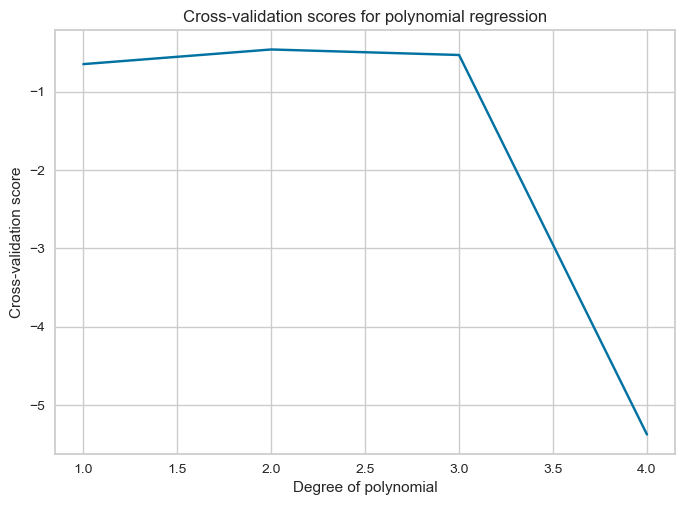

In [157]:
plt.plot(range (1, 5), cv_scores)
plt.title('Cross-validation scores for polynomial regression')
plt.xlabel('Degree of polynomial')
plt.ylabel('Cross-validation score')
plt.show()

### 3. Decision Tree 

I will be using the decession tree twice. The first time, I will be using regular decision tree regression and then I will try to use the best parameter by using gridsearch CV

Since our dataset has a varaiety of data type, hopefully decision tree cam offer a better outcome 

##### 3.1 Basic Tree 

In [158]:
# Build and fit the model 
dtr_tree = DecisionTreeRegressor(random_state=seed)
dtr_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [159]:

# Using the tree to predict and calculate the evaluation metrics. 
train_pred=dtr_tree.predict(X_train)
test_pred=dtr_tree.predict(X_test)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

# print out evaluation outcome 
print("Train R^2",train_r2)
print("Test R^2",test_r2)
print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)
print("Train_adjusted_r2:", adjusted_r2_score( train_r2.mean(), len(y_train), X_train.shape[1]))
print("Test_adjusted_r2:",  adjusted_r2_score( test_r2.mean(), len(y_test), X_test.shape[1]))


Train R^2 1.0
Test R^2 -0.08760307358840969
Training MSE:  1.1897134726669285e-32
Testing MSE:  54.52973182445922
Train_adjusted_r2: 1.0
Test_adjusted_r2: -0.08950226405451289


Model is over fitting and has a negative R^2 for testing data. However, compare the neagtive testing R^2 of other model, tree has a relatively smaller negtaive R^2, which is a good sign 

##### 3.2 Grid Seach CV

In [160]:
#Set up the range of all the parameters 
dtr = DecisionTreeRegressor(random_state=seed)
parameters = {'max_depth': [10,20,30,40,50,60], 
              'splitter': ('best','random')}
# using Gridsearch CV to find the best parameter combo
dtr_tuned = GridSearchCV(dtr, parameters, cv=tscv)
dtr_tuned.fit(X_train, y_train)
print("------ Best Parameters  ----------")
print(dtr_tuned.best_params_)
print("------ Best Model Train Accuracy ----------")
print(dtr_tuned.score(X_train, y_train))
print("------ Best Model Test Accuracy ----------")
print(dtr_tuned.score(X_test, y_test))

------ Best Parameters  ----------
{'max_depth': 10, 'splitter': 'best'}
------ Best Model Train Accuracy ----------
0.8793148317689857
------ Best Model Test Accuracy ----------
-0.12469503784439873


In [161]:
# Plug in the best parameter for a tree model 
dtr = DecisionTreeRegressor(random_state=seed)
parameters = {'max_depth': [10], 
              'splitter': ['random']}
# retrain the tree accroding to new parameters 
dtr_tuned = GridSearchCV(dtr, parameters, cv=tscv)
dtr_tuned.fit(X_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [10], 'splitter': ['random']})

In [162]:
# use the model to predict X_train and X_test 
train_pred=dtr_tuned.predict(X_train)
test_pred=dtr_tuned.predict(X_test)

#calculate the evaluation metrix 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

# Print out the result 
print("Train R^2",train_r2)
print("Test R^2",test_r2)
print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)
print("Train_adjusted_r2:", adjusted_r2_score( train_r2.mean(), len(y_train), X_train.shape[1]))
print("Test_adjusted_r2:",  adjusted_r2_score( test_r2.mean(), len(y_test), X_test.shape[1]))


Train R^2 0.7810466200440205
Test R^2 -0.00967639749161009
Training MSE:  11.648307203639938
Testing MSE:  50.622680757097044
Train_adjusted_r2: 0.7809194078546396
Test_adjusted_r2: -0.011439511107718792


Both training and testing R^2 decreased. The training is less overfitting but the testing decreased by a little bit. 

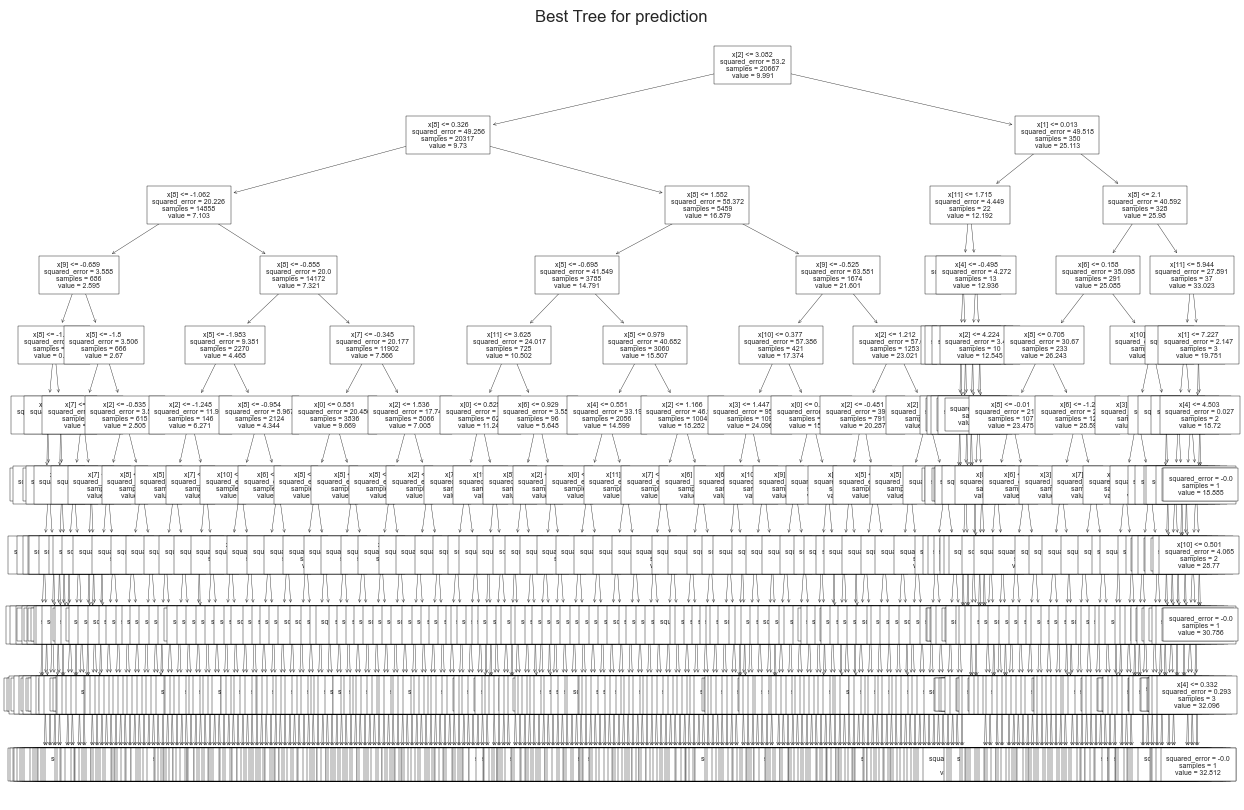

In [163]:


best_dtr = dtr_tuned.best_estimator_

#Print out the tree 

fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(best_dtr, fontsize=5, ax=ax)
plt.title('Best Tree for prediction')
plt.show()

## 4. Random Forest 


### WIll take a long time to run 


If the tree after tuning is performing well, we should also be able to that random forest to perform well.

I will create two Random Forest Model 
1. Basic Random Forest 
2. Random Forest with best features 

##### 4.1 Basic Model 


In [164]:
# creating the randomforest model 
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)

r2 = cross_val_score(rf, X_train, y_train, cv=tscv, scoring='r2')

# predict the train and test using the model 
train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)

#calculating 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)


In [165]:
print("Train R^2",train_r2)
print("Test R^2",test_r2)
print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)
print("Train_adjusted_r2:", adjusted_r2_score( train_r2.mean(), len(y_train), X_train.shape[1]))
print("Test_adjusted_r2:",  adjusted_r2_score( test_r2.mean(), len(y_test), X_test.shape[1]))


Train R^2 0.9952428862505989
Test R^2 0.2609410802749633
Training MSE:  0.2530781774952486
Testing MSE:  37.05458882358041
Train_adjusted_r2: 0.995240122361522
Test_adjusted_r2: 0.2596505233720674


Both positive R^2 for training and testing dataset. Random Forest perform as good as expected. Hoping after the best parameter the Random Forest 

##### 4.2 Random Forest using GridSearch CV to find the best prarameters 

In [166]:
# Creating a new Random Forest Model 
rfcv = RandomForestRegressor()
params = {
    'n_estimators': [5, 10],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Tune the model using gridsearch CV
rf_tuned = GridSearchCV(rfcv, parameters, cv=tscv)



In [167]:
grid_search.fit(X_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [168]:
# tuning the model based on the parameter outcome 

#use gridsearch cv building model
rf_best = grid_search.best_estimator_

# fit the tuned model 
rf_best.fit(X_train, y_train)

# create the predicted value for the new model
train_pred=rf_best.predict(X_train)
test_pred=rf_best.predict(X_test)

#calculate the evualtion metrics 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

print("Train R^2",train_r2)
print("Test R^2",test_r2)
print("Training MSE: ", mse_train)
print("Testing MSE: ", mse_test)
print("Train_adjusted_r2:", adjusted_r2_score( train_r2.mean(), len(y_train), X_train.shape[1]))
print("Test_adjusted_r2:",  adjusted_r2_score( test_r2.mean(), len(y_test), X_test.shape[1]))


Train R^2 0.6351276164846021
Test R^2 0.10391868923416014
Training MSE:  19.411189789197014
Testing MSE:  44.927303678679
Train_adjusted_r2: 0.6349156251704652
Test_adjusted_r2: 0.10235393723631525


Testing R^2 increased significantly without losing any accuracy from Training R^2. Therefore random froest with gridsearch CV for best parameter is the best model to predict our outcome variable. 

### Feature Importance

In [169]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
columnname = X.columns

In [170]:
columnname

Index(['doc_visit', 'google_search', 'HS_percapita', 'Political_Leaning',
       'public_transit', 'mask_wearing', 'inperson_school_fulltime',
       'daily admission per 100,000 population',
       'confirmed daily deaths per 100,000', 'people_fully_vaccined',
       'PL_Party_num'],
      dtype='object')

In [171]:
print(sorted_idx)

[11  0  4 10  3  1  7  9  5  6  2  8]


In [172]:
i=len(columnname)
column_array = [columnname[i] for i in sorted_idx if i < 11]
column_array

['doc_visit',
 'public_transit',
 'PL_Party_num',
 'Political_Leaning',
 'google_search',
 'daily admission per 100,000 population',
 'people_fully_vaccined',
 'mask_wearing',
 'inperson_school_fulltime',
 'HS_percapita',
 'confirmed daily deaths per 100,000']

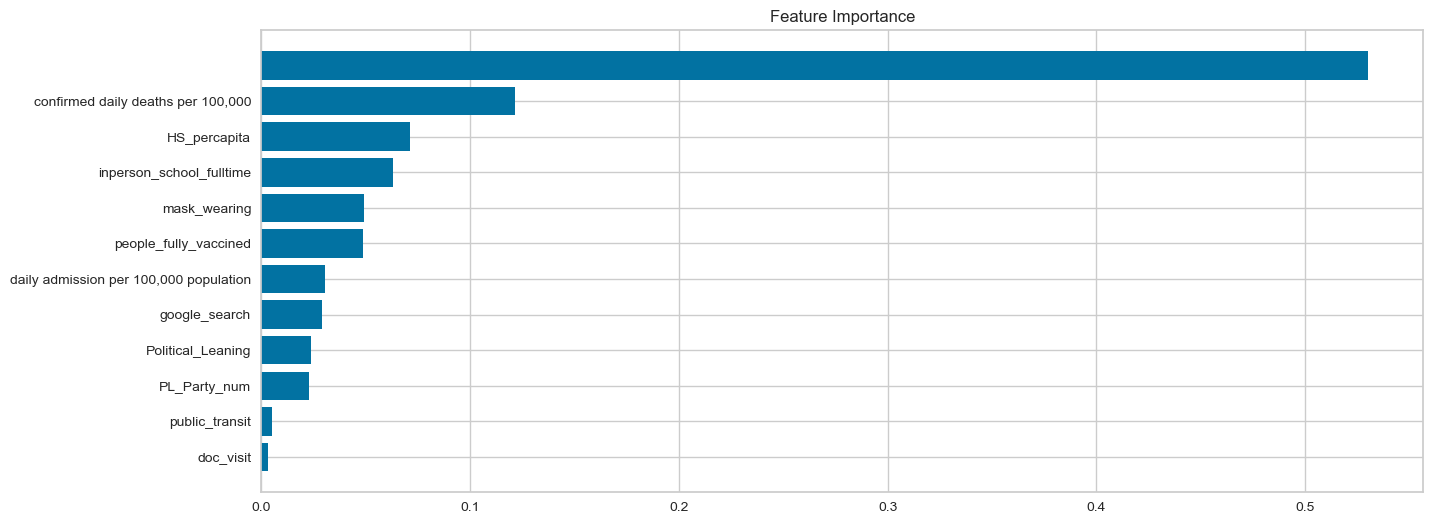

In [173]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(15, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range((len(column_array))), column_array)
plt.title('Feature Importance')
plt.savefig('foo.png')

According to the feature seletcion plot, the most importanct features for prediction is the clustering result and the next most important is the confirmedd death 

# 4.  Additional Model 

Althogh the previous model has demonstarte that regression is not the best model to use for predicting this dataset, I wanted to do perform both Ridge and Lasso on our data since there are certain variables are correlated and have not been looked into. Such as 'hopsitialization' and ' docvisit'. 

Elastic net will allow me do both perform Ridge and Lasso at once 

###  Elastic Net -- combine Ridge and Lasso 

In [175]:
#Import the package




# crate the model and use feature selected datast to train and fit model 
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_selected, y_train)

# using th model to predict 
elastic_train_pred = elastic_net.predict(X_train_selected)
elastic_test_pred = elastic_net.predict(X_test_selected)
elastic_rsquared_train = elastic_net.score(X_train_selected, y_train)
elastic_rsquared_test = elastic_net.score(X_test_selected, y_test)
elastic_mse_train = mean_squared_error(y_train, elastic_train_pred)
elastic_mse_test = mean_squared_error(y_test, elastic_test_pred)

# print out the evaluation result 
print(" R-squared Train: ", elastic_rsquared_train)
print("R-squared Test: ",elastic_rsquared_test)

print("Training MSE: ", elastic_mse_train)
print("Testing MSE: ", elastic_mse_test)

print("Train_adjusted_r2:", adjusted_r2_score( elastic_rsquared_train, len(y_train), X_poly_train.shape[1]))
print("Test_adjusted_r2:",  adjusted_r2_score( elastic_rsquared_test, len(y_test), X_poly_test.shape[1]))
   

 R-squared Train:  0.4895117628588477
R-squared Test:  0.10046488107556673
Training MSE:  27.157944815742255
Testing MSE:  45.100469089144276
Train_adjusted_r2: 0.4842711229585914
Test_adjusted_r2: 0.07216065947320971


In [176]:
# Plot the result for the model 

Text(0, 0.5, 'Predicted')

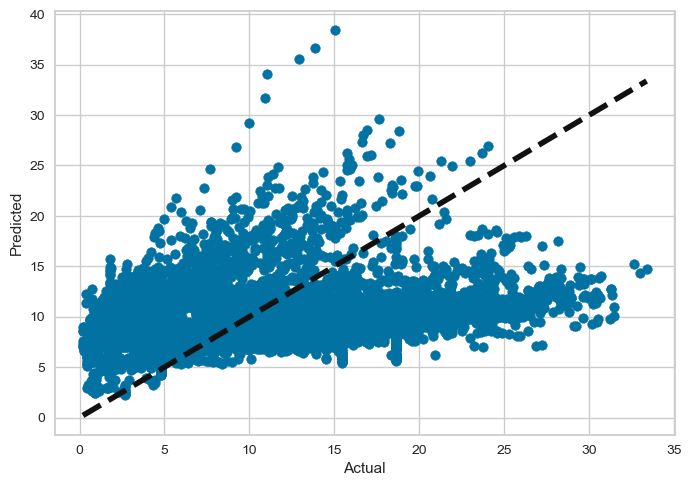

In [177]:
plt.scatter(y_test, elastic_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')


# 5. Conclusion and Future Work 



Among all my five models, my best model is a Random Forest Model which has a  testing R^2 is 0.26 A commonality among all model is the fact that all the model tend to over fitting with the training dataset and have a poor performance on the testing data set and some models even have negative squares for testing data set.So for any other similar dataset, we would recommend to use Random Forest for prediction. Moreover, we also find out using clustering help with the prediction. Clustering and confirmed death are the most important features for prediction.

Since our data is being collected over time, so we splitted the dataset manually as training and testing where the first 75% of data accoridng to the date are trianing and the rest as testing. By doing this, we are using the ' past' data to 'predict' the futrue by using training and testing. 


The dataset itself is very challenging as there are many other factors change the outcome variable such as policy, different version of covie virus, vaccine avaliablity etc. Such changes will all heaviliy influence the covid confirmed cases percentage over time. But they are not being recorded in the current data set. In addition, there are seasonality and trend in our outcome variable, but with machine learning model we cannot capture the such trend and seasonlity with ML model. 


So far future work, researchers should try to 
- a. Include more data, espeically event that's have siginificant influence on the over all soviety. - b. Try to use time series model. 


    


## Reference 
https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data

https://www.geeksforgeeks.org/change-the-x-or-y-ticks-of-a-matplotlib-figure/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
